# Fish Weight Prediction Using Linear & Polynomial Regression

Mid Project Machine Learning

Anggota Kelompok:
1. Muhammad Thoriq Ali Said             | H071201077
2. Muhammad Amirul Haq                  | H071201078
3. Umar Sabirin                         | H071201059
4. Bob Chrismansyah Pata'dungan Kabanga | H071201087

Link Video Penjelasan: https://www.youtube.com/watch?v=zDyv0Mn246g

# Importing Libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Fetch Dataset From Kaggle

Link Dataset: https://www.kaggle.com/datasets/aungpyaeap/fish-market

In [ ]:
## INFO: Uncomment Code di bawah ini jika ingin menggunakan/mengupload token api kaggle 

# !pip install -q kaggle
# from google.colab import files

# # Upload Token API Kaggle
# files.upload()

In [4]:
## INFO: Uncomment Code di bawah ini jika ingin menggunakan token api kaggle dan mendownload dataset

# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !kaggle datasets download -d aungpyaeap/fish-market --unzip

  0% 0.00/2.39k [00:00<?, ?B/s]
100% 2.39k/2.39k [00:00<00:00, 2.32MB/s]


In [5]:
df = pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# Understanding the Data

## Data Description

* Species: Species name of fish
* Weight: Weight of fish in gram
* Length1: Vertical length in cm
* Length2: Diagonal length in cm
* Length3: Cross length in cm
* Height: Height in cm
* Width: Diagonal width in cm

## Data Info

In [6]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [7]:
# Mengubuah nama attribut Lenght1, Lenght2, dan Lenght3 agar tidak bigung
df = df.rename(columns={'Length1':'VerticalLen','Length2':'DiagonalLen','Length3':'CrossLen'})
df.head()

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [8]:
# Melihat Banyaknya baris dan kolom dari dataset
df.shape

(159, 7)

In [9]:
# Melihat tiap tipe data dari feature dataset
df.dtypes

Species         object
Weight         float64
VerticalLen    float64
DiagonalLen    float64
CrossLen       float64
Height         float64
Width          float64
dtype: object

Dataset berisi 159 baris dan 7 kolom, di mana 6 kolom adalah Numerik dan 1 adalah Kategori.

In [10]:
df.describe(include='all')

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
count,159,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
unique,7,NaN,NaN,NaN,NaN,NaN,NaN
top,Perch,NaN,NaN,NaN,NaN,NaN,NaN
freq,56,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,NaN,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,NaN,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,NaN,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,NaN,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,NaN,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500


## Check Corellation


In [11]:
df.corr()

,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
VerticalLen,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
DiagonalLen,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
CrossLen,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


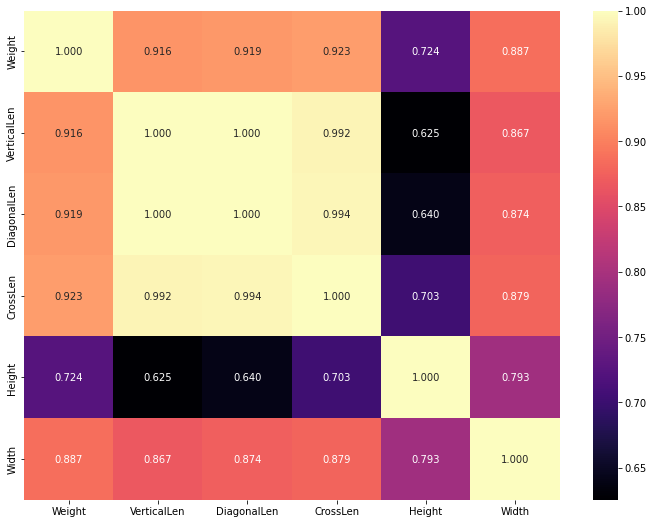

In [12]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), annot = True, cmap='magma',fmt='.3f')
plt.show()

Membaca Matriks Korelasi
* Koefisien korelasi berkisar dari -1 hingga +1
* Tanda(+/-) menunjukkan arah dan jumlah menunjukkan kekuatan korelasi
* +1.00 berarti hubungan positif yang sempurna
*0,00 berarti tidak ada hubungan
* -1.00 berarti hubungan negatif sempurna


In [13]:
df = df.drop(['Species','VerticalLen'	,'DiagonalLen','Height','Width'], axis=1)
df.head(3)

,Weight,CrossLen
0,242.0,30.0
1,290.0,31.2
2,340.0,31.1


# Preprocessing


##Check Missing Value

In [14]:
df.isnull().sum()

Weight      0
CrossLen    0
dtype: int64

## Check Duplicate Value

In [15]:
print("Sebelum data duplicate di drop:")
df.count()

Sebelum data duplicate di drop:


Weight      159
CrossLen    159
dtype: int64

In [16]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (5, 2)


In [17]:
duplicate_rows_df = df[df.duplicated(keep=False)]
print(duplicate_rows_df)

     Weight  CrossLen
7     390.0      35.0
9     500.0      36.2
11    500.0      36.2
14    600.0      37.2
15    600.0      37.2
16    700.0      38.3
54    390.0      35.0
86    120.0      23.5
87    120.0      23.5
113   700.0      38.3


In [18]:
df = df.drop_duplicates()

In [19]:
print("Sesudah data duplicate di drop: ")
df.count()

Sesudah data duplicate di drop: 


Weight      154
CrossLen    154
dtype: int64

## Check Not Logic Data

In [20]:
df[df.Weight <= 0]


,Weight,CrossLen
40,0.0,22.8


In [21]:
print("Ukuran dataset sebelum baris 40 di drop" ,df.shape)

Ukuran dataset sebelum baris 40 di drop (154, 2)


In [22]:
df = df.drop([40])
print("Ukuran dataset sesuah baris 40 di drop" ,df.shape)

Ukuran dataset sesuah baris 40 di drop (153, 2)


# Model Creation

In [23]:
X = np.array(df.iloc[:,1]) #CrossLen
y = np.array(df.iloc[:,0]) #Weight 

In [24]:
p = round((80/100)*len(X)) # 80% For Train Data
q = round((20/100)*len(X)) # 20% For Test Data

X_train = X[:p]
y_train = y[:p]
X_test = X[:q]
y_test = y[:q]

## Linear Regression

###f(x) = ax + b

Keterangan:

a = scope

b = intercept

In [25]:
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(X_train, y_train)

# Membuat Linear Regression Model
def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, X_train))

In [26]:
for i in range(31):
  print(X_test[i], y_test[i], myfunc(X_test[i]))

30.0 242.0 370.42845523171445
31.2 290.0 411.3412180924345
31.1 340.0 407.9318211873747
33.5 363.0 489.7573469088147
34.0 430.0 506.80433143411483
34.7 450.0 530.670109769535
34.5 500.0 523.8513159594149
35.0 390.0 540.8983004847148
35.1 450.0 544.3076973897751
36.2 500.0 581.8110633454351
36.2 475.0 581.8110633454351
36.4 500.0 588.6298571555549
37.3 340.0 619.3144293010951
37.2 600.0 615.9050323960353
38.3 700.0 653.408398351695
38.5 700.0 660.2271921618153
38.6 610.0 663.6365890668753
38.7 650.0 667.0459859719354
39.5 575.0 694.3211612124153
39.2 685.0 684.0929704972355
39.7 620.0 701.1399550225353
40.6 680.0 731.8245271680755
40.5 700.0 728.4151302630153
40.9 725.0 742.0527178832554
40.6 720.0 731.8245271680755
41.5 714.0 762.5090993136155
41.6 850.0 765.9184962186755
42.6 1000.0 800.0124652692757
44.1 920.0 851.1534188451758
44.0 955.0 847.7440219401158
45.3 925.0 892.0661817058958


In [27]:
scoreLinear = r**2
print("Score R2 Dari Model Linear Regression :")
scoreLinear

Score R2 Dari Model Linear Regression :


0.9121115518339744

## Polynomial Regression

### f(x) = a1 + a2x + a3x^2 + .. + anx^(n-1)


Keterangan: 

a1 = suku tetap atau konstanta

a2, a3, …, an = himpunan koefiesien


In [28]:
# Membuat Polynomial Model
mymodel2 = np.poly1d(np.polyfit(X_train, y_train, 3))

In [29]:
for i in range(31):
  print(X_test[i], y_test[i], mymodel2(X_test[i]))

30.0 242.0 297.84607155230697
31.2 290.0 337.69717312058293
31.1 340.0 334.2722798254038
33.5 363.0 421.6677008560394
34.0 430.0 441.23643014837864
34.7 450.0 469.4182697444015
34.5 500.0 461.2728896014673
35.0 390.0 481.77632884338044
35.1 450.0 485.932988233693
36.2 500.0 532.8853703367799
36.2 475.0 532.8853703367799
36.4 500.0 541.663904031462
37.3 340.0 582.0855864973864
37.2 600.0 577.5201639729778
38.3 700.0 628.7569322038374
38.5 700.0 638.3128063821955
38.6 610.0 643.118405081668
38.7 650.0 647.942436850702
39.5 575.0 687.1975611501482
39.2 685.0 672.3388816351587
39.7 620.0 697.195252712349
40.6 680.0 743.0933397217964
40.5 700.0 737.9202201964151
40.9 725.0 758.722552346361
40.6 720.0 743.0933397217964
41.5 714.0 790.4747805456
41.6 850.0 795.8307600376261
42.6 1000.0 850.3934783834375
44.1 920.0 935.6468581996894
44.0 955.0 929.8363550927868
45.3 925.0 1006.7832052929182


In [30]:
from sklearn.metrics import r2_score

scorePoly = r2_score(y_train, mymodel2(X_train))
print("Score R2 Dari Model Polynomial Regression :")
scorePoly

Score R2 Dari Model Polynomial Regression :


0.9651765559184052

# Perbandingan Linear Dan Polynomial


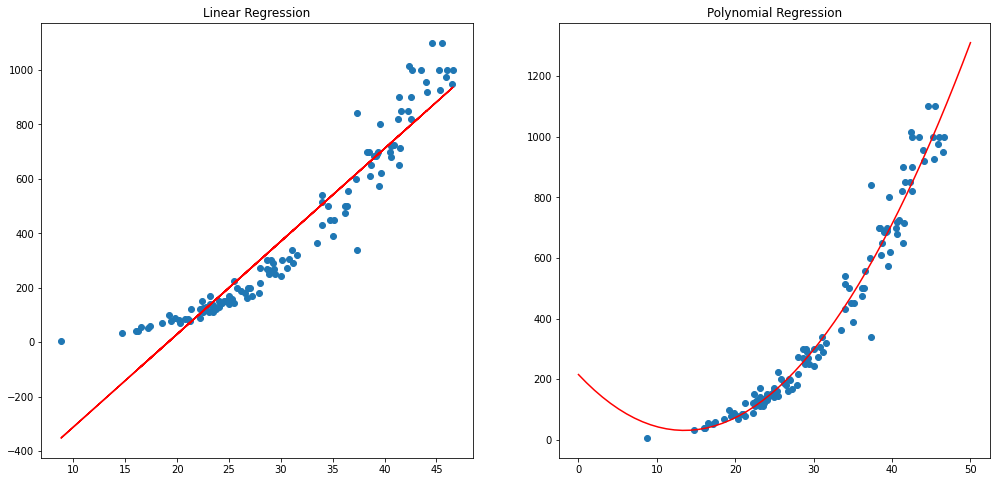


Score R2 Linear Regression:  0.9121115518339744 
Score R2 Polynomial Regression : 0.9651765559184052


In [37]:
plt.figure(figsize=(17,8))
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train)
plt.title("Linear Regression")
plt.plot(X_train, mymodel, color='red')

plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train)
myline = np.linspace(0,50)
plt.title("Polynomial Regression")
plt.plot(myline, mymodel2(myline), color='red')
plt.show() 

print("\nScore R2 Linear Regression: ",scoreLinear, 
      "\nScore R2 Polynomial Regression :", scorePoly)